In [31]:
import numpy as np
import pandas as pd

In [32]:
dataset = pd.read_csv('./Iris.csv')

In [33]:
dataset.shape

(150, 6)

In [34]:
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Algoritmo K-means - Implementação do Zero

## Análise do Dataset Iris

O dataset contém 150 amostras com 6 colunas. Conforme a atividade, vamos remover a coluna target (Species) e trabalhar apenas com as features numéricas.

In [44]:
# Removendo as colunas ID e Species (target)
X = dataset.drop(['Id', 'Species'], axis=1).values
print(f"Shape dos dados após remoção das colunas ID e Species: {X.shape}")
print(f"Features utilizadas: {dataset.drop(['Id', 'Species'], axis=1).columns.tolist()}")

Shape dos dados após remoção das colunas ID e Species: (150, 4)
Features utilizadas: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


## Implementação do Algoritmo K-means do Zero

Implementaremos o algoritmo, seguindo os passos:
1. Inicializar centroids aleatoriamente
2. Atribuir cada ponto ao centroid mais próximo
3. Recalcular centroids como média dos pontos atribuídos
4. Repetir até convergência

In [ ]:
import random
import matplotlib.pyplot as plt

class KMeansHardCoded:
    def __init__(self, k=3, max_iterations=100, random_state=42):
        """
        Inicializa o algoritmo K-means
        
        Parametros:
        k: número de clusters
        max_iterations: número máximo de iterações
        random_state: semente para reprodutibilidade
        """
        self.k = k
        self.max_iterations = max_iterations
        self.random_state = random_state
        
    def _initialize_centroids(self, X):
        """
        Inicializa os centroids aleatoriamente dentro do range dos dados
        """
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        
        centroids = np.zeros((self.k, n_features))
        for i in range(n_features):
            centroids[:, i] = np.random.uniform(X[:, i].min(), X[:, i].max(), self.k)
        
        return centroids
    
    def _euclidean_distance(self, point1, point2):
        """
        Calcula a distância euclidiana entre dois pontos
        """
        return np.sqrt(np.sum((point1 - point2) ** 2))
    
    def _assign_clusters(self, X, centroids):
        """
        Atribui cada ponto ao cluster mais próximo
        """
        clusters = []
        for point in X:
            distances = [self._euclidean_distance(point, centroid) for centroid in centroids]
            closest_cluster = distances.index(min(distances))
            clusters.append(closest_cluster)
        return np.array(clusters)
    
    def _update_centroids(self, X, clusters):
        """
        Atualiza os centroids como a média dos pontos em cada cluster
        """
        centroids = np.zeros((self.k, X.shape[1]))
        for i in range(self.k):
            cluster_points = X[clusters == i]
            if len(cluster_points) > 0:
                centroids[i] = np.mean(cluster_points, axis=0)
        return centroids
    
    def _has_converged(self, old_centroids, new_centroids, tolerance=1e-4):
        """
        Verifica se o algoritmo convergiu
        """
        return np.all(np.abs(old_centroids - new_centroids) < tolerance)
    
    def fit(self, X):
        """
        Executa o algoritmo K-means
        """
        # Inicializar centroids
        self.centroids = self._initialize_centroids(X)
        self.cost_history = []
        
        for iteration in range(self.max_iterations):
            # Atribuir clusters
            clusters = self._assign_clusters(X, self.centroids)
            
            # Calcular custo (soma das distâncias quadráticas)
            cost = 0
            for i, point in enumerate(X):
                cost += self._euclidean_distance(point, self.centroids[clusters[i]]) ** 2
            self.cost_history.append(cost)
            
            # Atualizar centroids
            new_centroids = self._update_centroids(X, clusters)
            
            # Verificar convergência
            if self._has_converged(self.centroids, new_centroids):
                print(f"Convergiu na iteração {iteration + 1}")
                break
                
            self.centroids = new_centroids
        
        self.labels_ = clusters
        self.n_iterations = iteration + 1
        return self
    
    def predict(self, X):
        """
        Prediz os clusters para novos dados
        """
        return self._assign_clusters(X, self.centroids)

## Experimentos com K=3 e K=5

In [37]:
# =================== EXPERIMENTO 1: K=3 ===================
kmeans_3 = KMeansHardCoded(k=3, max_iterations=100, random_state=42)
kmeans_3.fit(X)

print(f"Iterações até convergência: {kmeans_3.n_iterations}")
print(f"Custo final: {kmeans_3.cost_history[-1]:.2f}")

print(f"\nCENTROIDES FINAIS:")
for i, centroid in enumerate(kmeans_3.centroids):
    print(f"   Cluster {i}: [Sepal L: {centroid[0]:.2f}, Sepal W: {centroid[1]:.2f}, Petal L: {centroid[2]:.2f}, Petal W: {centroid[3]:.2f}]")

print(f"\nDISTRIBUIÇÃO DOS PONTOS:")
unique, counts = np.unique(kmeans_3.labels_, return_counts=True)
total_pontos = len(kmeans_3.labels_)
for cluster, num_pontos in zip(unique, counts):
    percentual = (num_pontos / total_pontos) * 100
    print(f"   Cluster {cluster}: {num_pontos:3d} pontos ({percentual:5.1f}%)")

print(f"\nTotal de pontos processados: {total_pontos}")

Convergiu na iteração 7
Iterações até convergência: 7
Custo final: 78.94

CENTROIDES FINAIS:
   Cluster 0: [Sepal L: 5.01, Sepal W: 3.42, Petal L: 1.46, Petal W: 0.24]
   Cluster 1: [Sepal L: 6.85, Sepal W: 3.07, Petal L: 5.74, Petal W: 2.07]
   Cluster 2: [Sepal L: 5.90, Sepal W: 2.75, Petal L: 4.39, Petal W: 1.43]

DISTRIBUIÇÃO DOS PONTOS:
   Cluster 0:  50 pontos ( 33.3%)
   Cluster 1:  38 pontos ( 25.3%)
   Cluster 2:  62 pontos ( 41.3%)

Total de pontos processados: 150


### Interpretação dos Resultados

**O que significam os números:**
- **Iterações**: Quantas vezes o algoritmo rodou até encontrar a melhor solução
- **Custo**: Soma das distâncias de todos os pontos aos seus centroids (menor = melhor)
- **Centroids**: Coordenadas do "centro" de cada cluster nas 4 dimensões do Iris
- **Distribuição**: Quantos pontos foram atribuídos a cada cluster

In [38]:
kmeans_5 = KMeansHardCoded(k=5, max_iterations=100, random_state=42)
kmeans_5.fit(X)

print(f"Iterações até convergência: {kmeans_5.n_iterations}")
print(f"Custo final: {kmeans_5.cost_history[-1]:.2f}")

print(f"\nCENTROIDES FINAIS:")
for i, centroid in enumerate(kmeans_5.centroids):
    print(f"   Cluster {i}: [Sepal L: {centroid[0]:.2f}, Sepal W: {centroid[1]:.2f}, Petal L: {centroid[2]:.2f}, Petal W: {centroid[3]:.2f}]")

print(f"\nDISTRIBUIÇÃO DOS PONTOS:")
unique, counts = np.unique(kmeans_5.labels_, return_counts=True)
total_pontos = len(kmeans_5.labels_)
for cluster, num_pontos in zip(unique, counts):
    percentual = (num_pontos / total_pontos) * 100
    print(f"   Cluster {cluster}: {num_pontos:3d} pontos ({percentual:5.1f}%)")

print(f"\nTotal de pontos processados: {total_pontos}")

Convergiu na iteração 11
Iterações até convergência: 11
Custo final: 49.87

CENTROIDES FINAIS:
   Cluster 0: [Sepal L: 4.71, Sepal W: 3.12, Petal L: 1.42, Petal W: 0.19]
   Cluster 1: [Sepal L: 7.09, Sepal W: 3.13, Petal L: 6.01, Petal W: 2.14]
   Cluster 2: [Sepal L: 6.29, Sepal W: 2.90, Petal L: 4.95, Petal W: 1.73]
   Cluster 3: [Sepal L: 5.58, Sepal W: 2.63, Petal L: 3.99, Petal W: 1.23]
   Cluster 4: [Sepal L: 5.26, Sepal W: 3.67, Petal L: 1.50, Petal W: 0.29]

DISTRIBUIÇÃO DOS PONTOS:
   Cluster 0:  23 pontos ( 15.3%)
   Cluster 1:  23 pontos ( 15.3%)
   Cluster 2:  47 pontos ( 31.3%)
   Cluster 3:  30 pontos ( 20.0%)
   Cluster 4:  27 pontos ( 18.0%)

Total de pontos processados: 150


## Avaliação dos Clusters com Silhouette Score

In [39]:
from sklearn.metrics import silhouette_score

# Calcular Silhouette Score para K=3
silhouette_3 = silhouette_score(X, kmeans_3.labels_)
print(f"=== AVALIAÇÃO COM SILHOUETTE SCORE ===")
print(f"Silhouette Score para K=3: {silhouette_3:.4f}")

# Calcular Silhouette Score para K=5
silhouette_5 = silhouette_score(X, kmeans_5.labels_)
print(f"Silhouette Score para K=5: {silhouette_5:.4f}")

print(f"\n=== ANÁLISE DOS RESULTADOS ===")
if silhouette_3 > silhouette_5:
    print(f"K=3 apresentou melhor resultado (Silhouette: {silhouette_3:.4f})")
    melhor_k = 3
    melhor_silhouette = silhouette_3
    melhor_modelo = kmeans_3
else:
    print(f"K=5 apresentou melhor resultado (Silhouette: {silhouette_5:.4f})")
    melhor_k = 5
    melhor_silhouette = silhouette_5
    melhor_modelo = kmeans_5

print(f"\nO melhor K encontrado foi: {melhor_k} (Silhouette Score: {melhor_silhouette:.4f})")

=== AVALIAÇÃO COM SILHOUETTE SCORE ===
Silhouette Score para K=3: 0.5526
Silhouette Score para K=5: 0.3723

=== ANÁLISE DOS RESULTADOS ===
K=3 apresentou melhor resultado (Silhouette: 0.5526)

O melhor K encontrado foi: 3 (Silhouette Score: 0.5526)


## Comparação com K-means do Sklearn

In [40]:
from sklearn.cluster import KMeans

print("=== COMPARAÇÃO COM SKLEARN ===")

# K-means sklearn para K=3
kmeans_sklearn_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_sklearn_3 = kmeans_sklearn_3.fit_predict(X)
silhouette_sklearn_3 = silhouette_score(X, labels_sklearn_3)

print(f"SKLEARN K=3:")
print(f"  Silhouette Score: {silhouette_sklearn_3:.4f}")
print(f"  Centroids:")
for i, centroid in enumerate(kmeans_sklearn_3.cluster_centers_):
    print(f"    Cluster {i}: [{centroid[0]:.2f}, {centroid[1]:.2f}, {centroid[2]:.2f}, {centroid[3]:.2f}]")

# K-means sklearn para K=5
kmeans_sklearn_5 = KMeans(n_clusters=5, random_state=42, n_init=10)
labels_sklearn_5 = kmeans_sklearn_5.fit_predict(X)
silhouette_sklearn_5 = silhouette_score(X, labels_sklearn_5)

print(f"\nSKLEARN K=5:")
print(f"  Silhouette Score: {silhouette_sklearn_5:.4f}")
print(f"  Centroids:")
for i, centroid in enumerate(kmeans_sklearn_5.cluster_centers_):
    print(f"    Cluster {i}: [{centroid[0]:.2f}, {centroid[1]:.2f}, {centroid[2]:.2f}, {centroid[3]:.2f}]")

print(f"\n=== COMPARAÇÃO DOS RESULTADOS ===")
print(f"K=3 - Nossa implementação: {silhouette_3:.4f} | Sklearn: {silhouette_sklearn_3:.4f}")
print(f"K=5 - Nossa implementação: {silhouette_5:.4f} | Sklearn: {silhouette_sklearn_5:.4f}")

# Determinar melhor K do sklearn
if silhouette_sklearn_3 > silhouette_sklearn_5:
    melhor_k_sklearn = 3
    melhor_modelo_sklearn = kmeans_sklearn_3
    melhor_labels_sklearn = labels_sklearn_3
    melhor_silhouette_sklearn = silhouette_sklearn_3
else:
    melhor_k_sklearn = 5
    melhor_modelo_sklearn = kmeans_sklearn_5
    melhor_labels_sklearn = labels_sklearn_5
    melhor_silhouette_sklearn = silhouette_sklearn_5

print(f"\nMelhor K (nossa implementação): {melhor_k}")
print(f"Melhor K (sklearn): {melhor_k_sklearn}")

=== COMPARAÇÃO COM SKLEARN ===
SKLEARN K=3:
  Silhouette Score: 0.5526
  Centroids:
    Cluster 0: [5.90, 2.75, 4.39, 1.43]
    Cluster 1: [5.01, 3.42, 1.46, 0.24]
    Cluster 2: [6.85, 3.07, 5.74, 2.07]

SKLEARN K=5:
  Silhouette Score: 0.4885
  Centroids:
    Cluster 0: [6.21, 2.85, 4.75, 1.56]
    Cluster 1: [5.01, 3.42, 1.46, 0.24]
    Cluster 2: [5.51, 2.60, 3.91, 1.20]
    Cluster 3: [7.47, 3.12, 6.30, 2.05]
    Cluster 4: [6.53, 3.06, 5.51, 2.16]

=== COMPARAÇÃO DOS RESULTADOS ===
K=3 - Nossa implementação: 0.5526 | Sklearn: 0.5526
K=5 - Nossa implementação: 0.3723 | Sklearn: 0.4885

Melhor K (nossa implementação): 3
Melhor K (sklearn): 3


## Redução de Dimensionalidade com PCA e Visualização

Agora vamos aplicar PCA com 1 e 2 componentes e visualizar os clusters com o melhor K encontrado (K=3).

In [41]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do matplotlib
plt.style.use('default')
sns.set_palette("husl")

# Aplicar PCA com 1 componente
pca_1d = PCA(n_components=1)
X_pca_1d = pca_1d.fit_transform(X)

# Aplicar PCA com 2 componentes  
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

print("=== ANÁLISE PCA ===")
print(f"Variância explicada com 1 componente: {pca_1d.explained_variance_ratio_[0]:.4f} ({pca_1d.explained_variance_ratio_[0]*100:.2f}%)")
print(f"Variância explicada com 2 componentes: {pca_2d.explained_variance_ratio_.sum():.4f} ({pca_2d.explained_variance_ratio_.sum()*100:.2f}%)")

# Aplicar K-means nos dados reduzidos (usando melhor K = 3)
# PCA 1D
kmeans_pca_1d = KMeans(n_clusters=melhor_k, random_state=42, n_init=10)
labels_pca_1d = kmeans_pca_1d.fit_predict(X_pca_1d)
silhouette_pca_1d = silhouette_score(X_pca_1d, labels_pca_1d)

# PCA 2D
kmeans_pca_2d = KMeans(n_clusters=melhor_k, random_state=42, n_init=10)
labels_pca_2d = kmeans_pca_2d.fit_predict(X_pca_2d)
silhouette_pca_2d = silhouette_score(X_pca_2d, labels_pca_2d)

print(f"\n=== SILHOUETTE SCORES COM PCA ===")
print(f"Dados originais (4D): {melhor_silhouette:.4f}")
print(f"PCA 1D: {silhouette_pca_1d:.4f}")
print(f"PCA 2D: {silhouette_pca_2d:.4f}")

=== ANÁLISE PCA ===
Variância explicada com 1 componente: 0.9246 (92.46%)
Variância explicada com 2 componentes: 0.9776 (97.76%)

=== SILHOUETTE SCORES COM PCA ===
Dados originais (4D): 0.5526
PCA 1D: 0.6772
PCA 2D: 0.5976


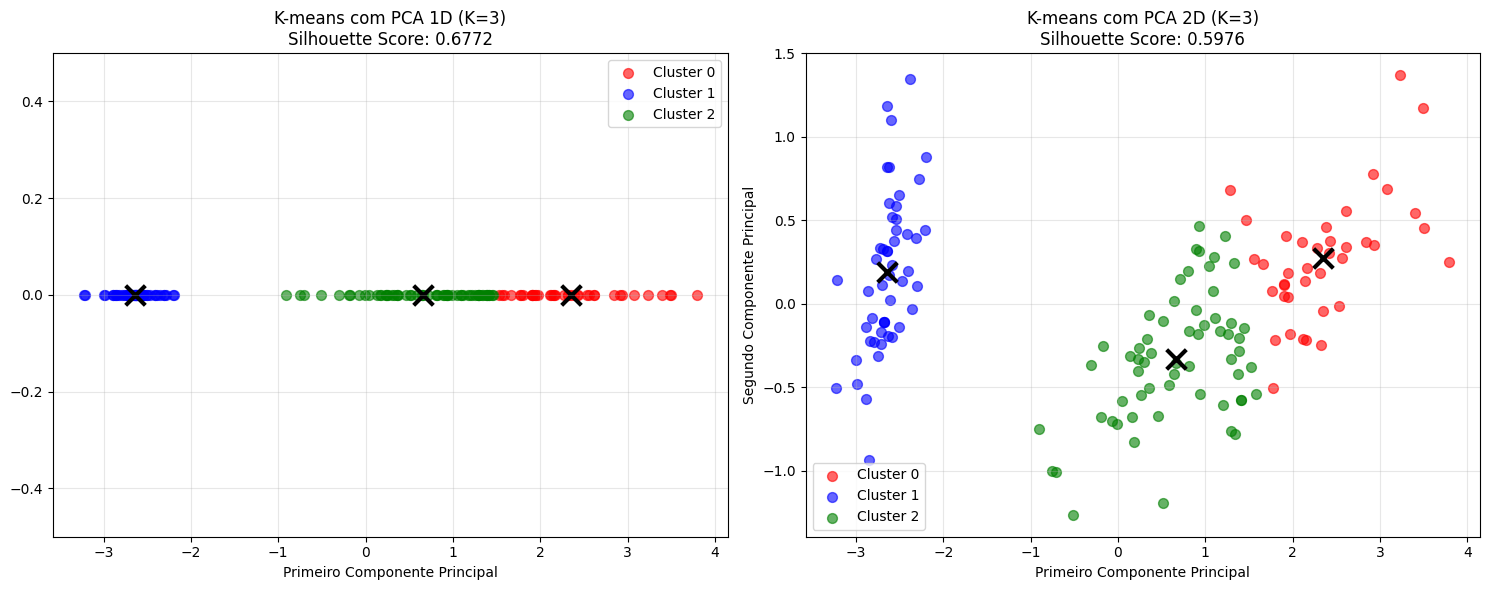

=== CENTROIDES COM PCA ===
PCA 1D - Centroides:
  Cluster 0: 2.3557
  Cluster 1: -2.6408
  Cluster 2: 0.6585

PCA 2D - Centroides:
  Cluster 0: [2.3465, 0.2724]
  Cluster 1: [-2.6408, 0.1905]
  Cluster 2: [0.6644, -0.3303]


In [43]:
# Visualização dos clusters
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1D (usando um scatter plot no eixo x)
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(melhor_k):
    cluster_points = X_pca_1d[labels_pca_1d == i]
    axes[0].scatter(cluster_points, [0] * len(cluster_points), 
                   c=colors[i], label=f'Cluster {i}', alpha=0.6, s=50)
    # Plotar centroide
    axes[0].scatter(kmeans_pca_1d.cluster_centers_[i], [0], 
                   c='black', marker='x', s=200, linewidths=3)

axes[0].set_xlabel('Primeiro Componente Principal')
axes[0].set_title(f'K-means com PCA 1D (K={melhor_k})\nSilhouette Score: {silhouette_pca_1d:.4f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(-0.5, 0.5)

# Plot 2D
for i in range(melhor_k):
    cluster_points = X_pca_2d[labels_pca_2d == i]
    axes[1].scatter(cluster_points[:, 0], cluster_points[:, 1], 
                   c=colors[i], label=f'Cluster {i}', alpha=0.6, s=50)
    # Plotar centroide
    axes[1].scatter(kmeans_pca_2d.cluster_centers_[i, 0], 
                   kmeans_pca_2d.cluster_centers_[i, 1],
                   c='black', marker='x', s=200, linewidths=3)

axes[1].set_xlabel('Primeiro Componente Principal')
axes[1].set_ylabel('Segundo Componente Principal')
axes[1].set_title(f'K-means com PCA 2D (K={melhor_k})\nSilhouette Score: {silhouette_pca_2d:.4f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Adicionar informação sobre os centroides
print(f"=== CENTROIDES COM PCA ===")
print(f"PCA 1D - Centroides:")
for i, centroid in enumerate(kmeans_pca_1d.cluster_centers_):
    print(f"  Cluster {i}: {centroid[0]:.4f}")

print(f"\nPCA 2D - Centroides:")
for i, centroid in enumerate(kmeans_pca_2d.cluster_centers_):
    print(f"  Cluster {i}: [{centroid[0]:.4f}, {centroid[1]:.4f}]")